In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("ggplot")

In [2]:
from scipy.stats import uniform
from scipy.stats import bernoulli
from scipy.stats import beta as sci_beta

## Estimating the probability of drawing a fraud from a cluster

* Let $\theta \in \{0, 1\}$ be the probability of selecting a *fraud* from a cluster.

The estimator $\hat{\theta}$ can be determined using the mean of a Beta distribution as the Beta distribution is a conjugate prior to the binomial distribution.
Moreover, Jeffreys' prior probability (Beta(0.5,0.5) is the most uninformative prior for a Bernoulli.
* Let $s$ be the number of frauds in the cluser
* Let $n$ be the number or draws from the cluster

The estimated probability of drawing a fraud from a cluster given the previous draws is: $p(\theta_{i} | n_{i},s_{i}) = \hat{\theta} \approx E[B(\alpha_{i} + s_{i},~\beta_{i} + n_{i} - s_{i})]$

### Example

Let the true probability $\theta = 0.3$

In [3]:
theta = 0.1

We draw a sample of size $1e3$

In [4]:
sample = bernoulli.rvs(theta, size=1000)

As there is no information regarding $\theta$ we start with Jeffry's prior which is equal to $\alpha, \beta = 0.5$.

In [5]:
alpha, beta = 0.5, 0.5

In [6]:
n = 0
frauds = 0

We determine the mean probability of the sample

In [7]:
sample_mean = sample.mean()

We simulate drawing thousand cases from the cluster and store the estimate of the mean and its error.

In [8]:
def beta_var(alpha, beta):
    return ((alpha * beta) / (((alpha + beta)**2) * (alpha + beta + 1)))

In [9]:
beta_var(alpha, beta)

0.125

In [10]:
estimates_of_theta = []
error_of_mean = []
entropy_store = []
var = []
varentropy = []
for s in sample:
    p = alpha / (alpha + beta)
    estimates_of_theta.append(p)
    error_of_mean.append(estimates_of_theta[-1] - sample_mean)
    entropy_store.append(bernoulli.entropy(p))
    var.append(beta_var(alpha, beta))
    if s == 1:
        frauds += 1
    n += 1
    alpha = 0.5 + frauds
    beta = 0.5 + n - frauds

When we plot the error between the mean of the sample and the estimate

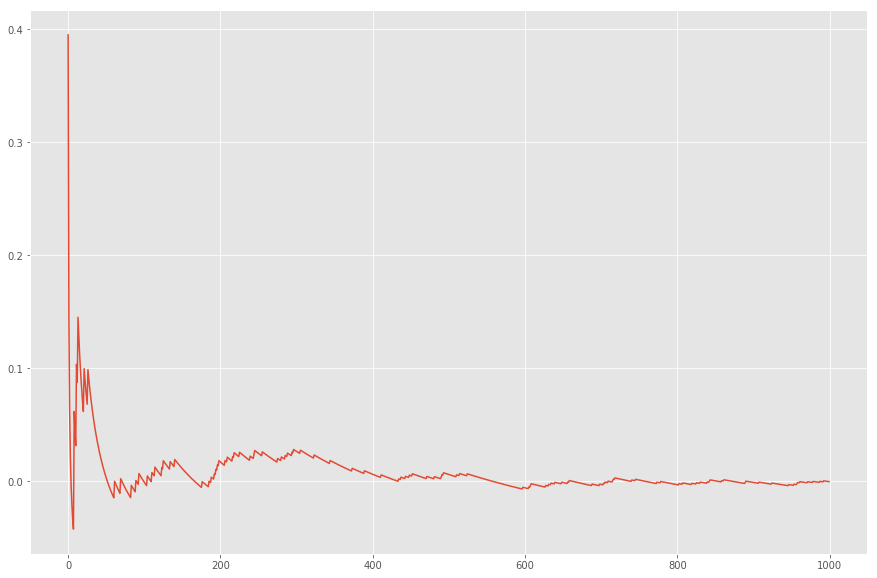

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(error_of_mean)

In [12]:
print('The mean of the error is {0:0.4f} and the variance of the error is {1:0.4f}'.format(
    np.array(error_of_mean).mean(),
    np.var(error_of_mean)))

The mean of the error is 0.0071 and the variance of the error is 0.0004


For small clusters the estimate will not be particularly good and this should be taken into account, however, overall the estimator is good enough for the purpose.

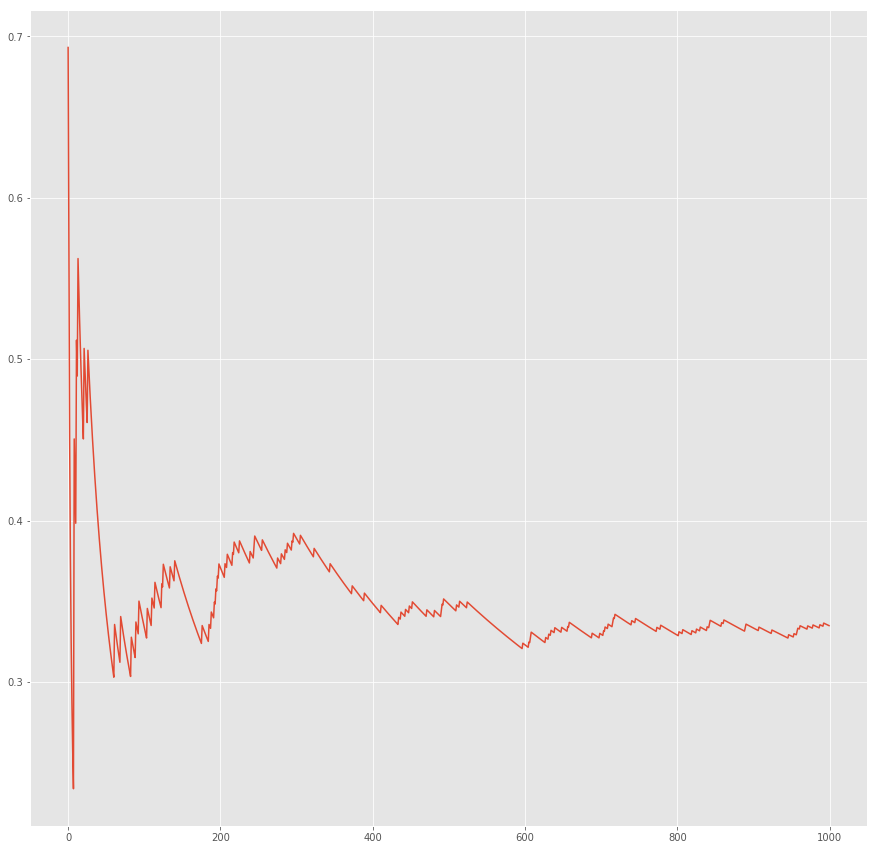

In [13]:
plt.figure(figsize=(15, 15))
plt.plot(entropy_store)

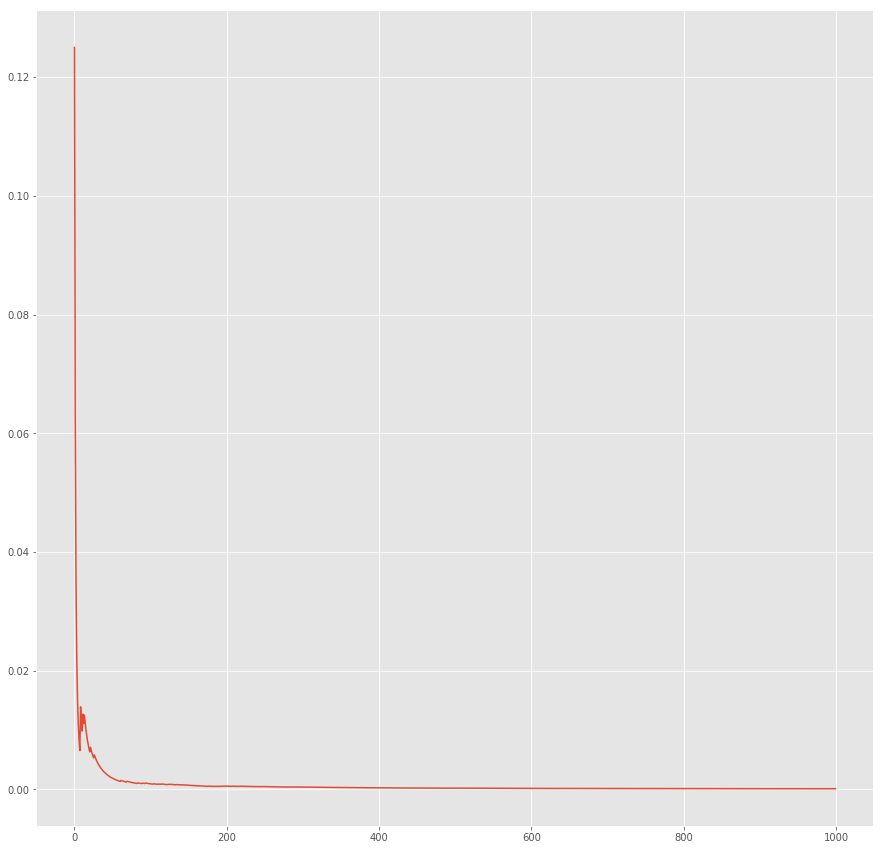

In [14]:
plt.figure(figsize=(15, 15))
plt.plot(var)